In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import os
import numpy as np
# price_csv = "exports/elec_prices_state.csv"
price_csv=os.path.join("exports","elec_prices_state.csv")
# population_csv = "exports/PopTaxes_state.csv"
population_csv = os.path.join("exports","PopTaxes_state.csv")
#populationEST_csv="data\nst-est2019-01.csv" 
populationEST_csv=os.path.join("data","nst-est2019-01.csv")

In [2]:
#importing and cleaning price data
price_data = pd.read_csv(price_csv)
price_data = price_data.drop(['Unnamed: 0'], axis=1)
price_data = price_data.rename(columns = {"State":"State Abbreviation"})

In [3]:
#importing and cleaning population data
population_data = pd.read_csv(population_csv)
population_data = population_data.drop(['Unnamed: 0','Abbreviation_y'], axis=1)

In [4]:
#importing and cleaning population ESTIMATE data
populationEST_data=pd.read_csv(populationEST_csv)
populationEST_data=populationEST_data.rename(columns = {"Unnamed: 0":"State"})
populationEST_data=populationEST_data.drop(columns=["Census","Estimates Base"])

In [5]:
Analysis1_df = price_data.merge(populationEST_data,on="State Abbreviation")
Analysis1_df.head()

,State Abbreviation,2020 price,2019 price,2018 price,2017 price,2016 price,2015 price,2020 so far sales,2019 sales,2018 sales,...,2010 Pop Est,2011 Pop Est,2012 Pop Est,2013 Pop Est,2014 Pop Est,2015 Pop Est,2016 Pop Est,2017 Pop Est,2018 Pop Est,2019 Pop Est
0,AL,9.73,9.88,9.63,9.83,9.56,9.33,39555.42529,87734.82971,90280.45601,...,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,AK,20.15,20.43,19.36,19.10,17.93,17.59,3004.94888,5840.97456,5972.46697,...,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
2,AZ,10.30,10.64,10.85,10.64,10.33,10.34,36209.02713,77720.38750,78346.30198,...,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
3,AR,8.09,8.13,7.78,8.26,8.13,8.19,21469.48132,47916.95892,49602.70799,...,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
4,CA,17.03,17.04,16.58,16.06,15.23,15.42,112830.38146,247679.77249,255224.27196,...,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223


correlation coefficient is 0.02


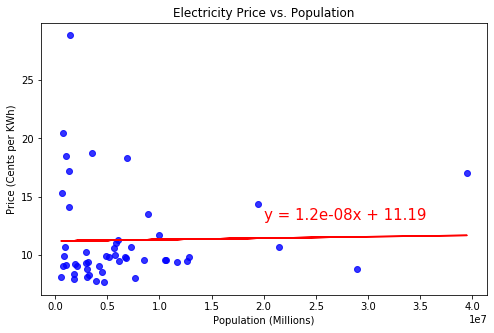

In [38]:
#correlation calculation
correlation = st.pearsonr((Analysis1_df["2019 Pop Est"]),(Analysis1_df["2019 price"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = linregress((Analysis1_df["2019 Pop Est"]),(Analysis1_df["2019 price"]))
regression_values = (Analysis1_df["2019 Pop Est"]) * slope + intercept
line_eq = "y = " + str(round(slope,9)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(Analysis1_df["2019 Pop Est"]), y=(Analysis1_df["2019 price"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((Analysis1_df["2019 Pop Est"]), regression_values, "red")
# plt.annotate(line_eq, fontsize=15, color="red")
plt.annotate(line_eq, (20000000,13), fontsize=15, color="red")
plt.title('Electricity Price vs. Population')
plt.ylabel('Price (Cents per KWh)')
plt.xlabel("Population (Millions)")
#plt.annotate(Analysis1_df["State Abbreviation"], (3,3))
# plt.grid()
plt.savefig("exports/2019_price_vs_population.png")

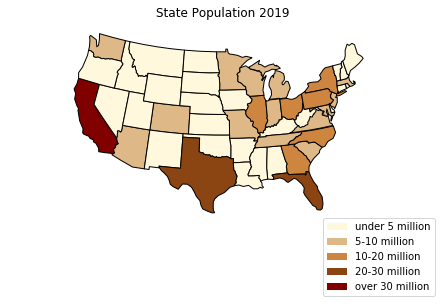

<Figure size 720x576 with 0 Axes>

In [29]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib as mpl
import matplotlib.patches as mpatches

tag_dict = dict(zip(Analysis1_df["State"], Analysis1_df["2019 Pop Est"]))

fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

#ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.set_extent([-125, -66.5, 12, 50], ccrs.Geodetic())

#max_users = float(max(Analysis1_df["2019 Pop Est"]))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

#cmap = mpl.cm.Blues

popplot = tag_dict

#ax.background_patch.set_visible(False)
#ax.outline_patch.set_visible(False)

ax.set_title('State Population 2019')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    edgecolor = 'black'

    try:
        state_pop = popplot[ astate.attributes['name'] ]
    except:
        state_pop = 0

    # simple scheme to assign color to each state
    if state_pop < 5000000:
        facecolor = "#FFF8DC"
    elif state_pop > 30000000:
        facecolor = "#800000"   
    elif state_pop > 20000000:
        facecolor = "#8B4513"        
    elif state_pop > 10000000:
        facecolor = "#CD853F"
    else:
        facecolor = "#DEB887"

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

    pop1 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FFF8DC")
    pop2 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#DEB887")
    pop3 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#CD853F")
    pop4 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#8B4513")
    pop5 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#800000")
    labels = ['under 5 million',
              '5-10 million',
             "10-20 million",
             "20-30 million",
             "over 30 million"]
    plt.legend([pop1, pop2, pop3, pop4, pop5], labels,
               loc='lower left', bbox_to_anchor=(0.72, 0.0), fancybox=True)
ax.outline_patch.set_edgecolor('white')
plt.savefig('exports/2019population.png')
plt.figure(figsize=(10,8))

plt.show()

#print("Red = +20 million people, orange =+10 million people, yellow = +5 million people")

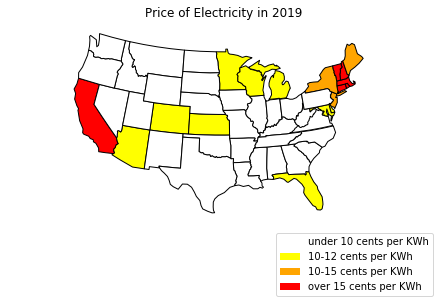

In [28]:
tag_dict2 = dict(zip(Analysis1_df["State"], Analysis1_df["2019 price"]))
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 12, 50], ccrs.Geodetic())

#max_users = float(max(Analysis1_df["2019 Pop Est"]))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

#cmap = mpl.cm.Blues

plot = tag_dict2

#ax.background_patch.set_visible(False)
#ax.outline_patch.set_visible(False)

ax.set_title('Price of Electricity in 2019')

for astate in shpreader.Reader(states_shp).records():
    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_price = plot[ astate.attributes['name'] ]
    except:
        state_price = 0

    # simple scheme to assign color to each state
    if state_price < 10:
        facecolor = "white"
    elif state_price > 15:
        facecolor = "red"        
    elif state_price > 12:
        facecolor = "orange"
    else:
        facecolor = "yellow"

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

    pop1 = mpatches.Rectangle((0, 0), 1, 1, facecolor="white")
    pop2 = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
    pop3 = mpatches.Rectangle((0, 0), 1, 1, facecolor="orange")
    pop4 = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
    labels = ['under 10 cents per KWh',
              '10-12 cents per KWh',
             "10-15 cents per KWh",
             "over 15 cents per KWh"]
    plt.legend([pop1, pop2, pop3, pop4], labels,
               loc='lower left', bbox_to_anchor=(0.61,0.0), fancybox=True)
# ax.set(frame_on=False)  # New
# ax.box(False)
ax.outline_patch.set_edgecolor('white')
plt.savefig('exports/2019price.png')
# plt.figure(figsize=(10,7))
plt.show()

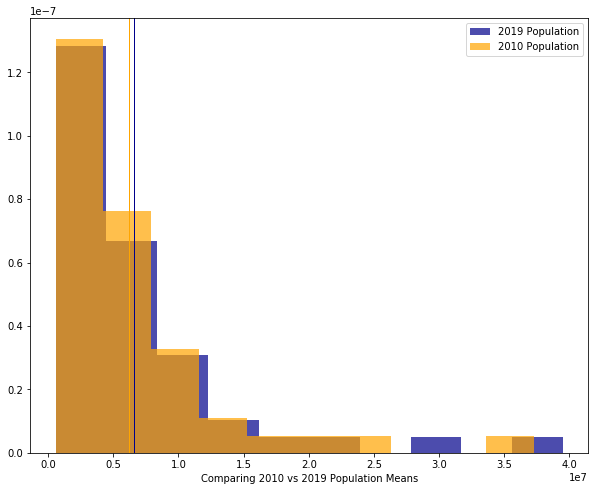

In [9]:
plt.figure(figsize=(10,8))
plt.xlabel("Comparing 2010 vs 2019 Population Means")
plt.hist((Analysis1_df["2019 Pop Est"]), density=True, color='darkblue', alpha=0.7, label="2019 Population")
plt.hist((Analysis1_df["2010 Pop Est"]), density=True, color='orange', alpha=0.7, label="2010 Population")
plt.axvline((Analysis1_df["2019 Pop Est"]).mean(), color='darkblue', linestyle='solid', linewidth=1)
plt.axvline((Analysis1_df["2010 Pop Est"]).mean(), color='orange', linestyle='solid', linewidth=1)
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.legend(loc='upper right')
plt.savefig('exports/ttestonpop.png')

In [10]:
from scipy import stats
stats.ttest_ind((Analysis1_df["2019 Pop Est"]), (Analysis1_df["2010 Pop Est"]))

Ttest_indResult(statistic=0.2638918585755584, pvalue=0.7924173701779269)

In [11]:
print("Data is non-normal. There is no statistical significance in the means of the populations.")

Data is non-normal. There is no statistical significance in the means of the populations.
